## Hidden Markov Models

A Hidden Markov Model (HMM) is a stochastic model of discrete events and a variation of the Markov chain which is useful in computing the probability for a sequence. HMM states are hidden or can only be inferred from the observed parameters.

<!-- Formally, let $X_n$ and $Y_n$ be discrete-time stochastic processes and $n ≥ 1$.
$(X_n, Y_n)$ is a hidden markov model if $X_n$ is a Markov -->
The notation for an HMM is:

$\lambda = (A,B,\pi)$
* $A$ (transition probability matrix) = $a_{11} ... a_{ij} ... a_{NN}$
* $B$ (observation probability matrix) = $b_i(o_t)$
* $\pi$ (initial state distribution) = $\pi_1, ... \pi_2, \pi_N $
* $Q$ (a set of N states) = $q_1q_2...q_N$
* $O$ (a sequence of T observations) = $o_1o_2...o_T$



#### Computing Likelihood of an observation sequence:

For a particular hidden state sequence $Q=q_0,q_1,...q_T$ and an observation sequence $O=o_1,o_2,...,o_T$
<!-- Given an HMM $\lambda = (A,B)$ and an observation sequence $O$, determine the likelihood $P(O|\lambda)$ -->
<img src="https://latex.codecogs.com/svg.latex?P%28O%7CQ%29%3D%5Cprod_%7Bi%3D1%7D%5E%7BT%7DP%28o_i%7Cq_i%29" />

### Using HMM to model volatility regimes in SPY
<!-- Since HMM are essentially a mixture of Gaussian distributions, sampling the means and variances from the low and high volatility Gaussion distributions will allow us to have a fat tailed distribution which affect stock returns. -->

Observations in the stock market:
* Long periods of low volatility
* Short periods of high volatility

When applying an HMM in the real world, there are three main subproblems that are associated with fitting the model.
<ol>
    <li>Estimate the probability of occurrence for the set of observations. This can be done by applying the forward algorithim. The algorithim does this by summing the probabilities of all of the various hidden state paths than can potentially generate the observation sequence.</li><br/>
    <li>Determining the most optimal sequence of hidden states for the HMM given the set of observations. This can be solved by the Viterbi algorithim. The Vertibi algorithim recursively computes the most probable path through a sequence of states by storing the probability and state sequence of the most probable path at each point of time.
    </li><br/>
    <li>Finding the optimal parameters A, µ, σ, and π of the HMM. This can be done by using Baum-Welch algorithim, gradient ascent or expectation-maximization.
    </li>
</ol>

--<cite>(J. Risk Financial Manag. 2020, 13, 311)</cite>


<!-- let $z(t)$ = regime at time $t$ and $x(t)$ = returns of stock at time $t$
The generic states are $z(t) ∈ \{1,2,3...,N\}$ \
Probability of going to the next state from the current state: $p[z(t+1)=j | z(t)=i] = A_{ij}$
 -->


In [1]:
from hmmlearn import hmm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(2263, 6)


<AxesSubplot:>

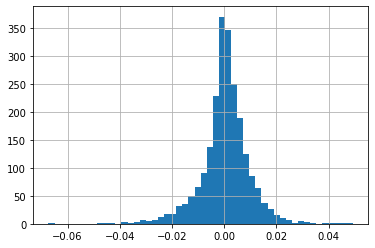

In [22]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
print(df.shape)

returns = np.log(df['Close']).diff()
returns.dropna(inplace=True)
returns.hist(bins=50)

In [27]:
# Initialize the model
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

# Fitting the model to find the optimal paramaters of A, µ, σ
X = returns.to_numpy().reshape(-1,1)
model.fit(X)

# Verterbi algorthim
Z = model.predict(X)